In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

student_per = pd.read_csv("StudentsPerformance.csv")

student_per.head(4)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mathscore,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,NaN,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44


In [3]:
student_per.drop(['lunch','test preparation course'],axis = 1)


,gender,race/ethnicity,parental level of education,mathscore,reading score,writing score
0,female,group B,bachelor's degree,72,72,74
1,female,group C,NaN,69,90,88
2,female,group B,master's degree,90,95,93
3,male,group A,associate's degree,47,57,44
4,male,group C,NaN,76,78,75
...,...,...,...,...,...,...
995,female,group E,master's degree,88,99,95
996,male,group C,high school,62,55,55
997,female,group C,high school,59,71,65
998,female,group D,NaN,68,78,77


In [4]:
student_per['parental level of education'] = student_per['parental level of education'].fillna("default")


In [5]:
student_per


,gender,race/ethnicity,parental level of education,lunch,test preparation course,mathscore,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,default,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,default,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,default,standard,completed,68,78,77


In [6]:
student_per['race/ethnicity'] = student_per['race/ethnicity'].map({
    'group A':'Asian Students',
    'group B':'African Students',
    'group C':'Afro-Asian Students',
    'group D':'American Students',
    'group E':'European Students’'
}
)

In [7]:
student_per.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mathscore,reading score,writing score
0,female,African Students,bachelor's degree,standard,none,72,72,74
1,female,Afro-Asian Students,default,standard,completed,69,90,88
2,female,African Students,master's degree,standard,none,90,95,93
3,male,Asian Students,associate's degree,free/reduced,none,47,57,44
4,male,Afro-Asian Students,default,standard,none,76,78,75


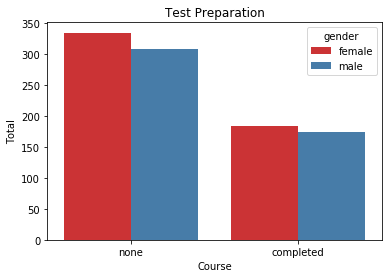

In [8]:
ax = sns.countplot(x="test preparation course", hue="gender", palette="Set1", data=student_per)
ax.set(title="Test Preparation", xlabel="Course", ylabel="Total")
plt.show()

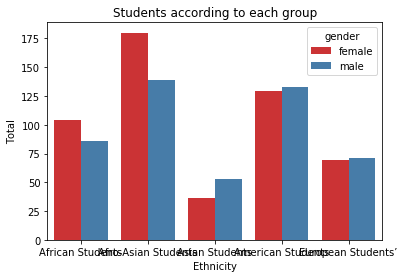

In [9]:
ax = sns.countplot(x="race/ethnicity", hue="gender", palette="Set1", data=student_per)
ax.set(title="Students according to each group", xlabel="Ethnicity", ylabel="Total")
plt.show()


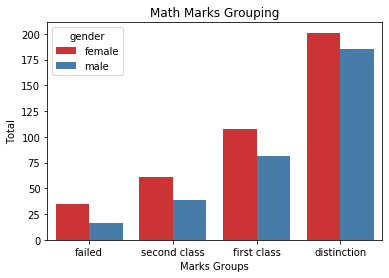

In [10]:
marks_intervals = [0, 40, 50, 60, 75]
categories = ['failed', 'second class', 'first class', 'distinction']
student_per['Marks_Categories_math'] = pd.cut(student_per.mathscore, marks_intervals, labels=categories)
ax = sns.countplot(x="Marks_Categories_math", hue="gender", palette="Set1", data=student_per)
ax.set(title="Math Marks Grouping", xlabel="Marks Groups", ylabel="Total")
plt.show()

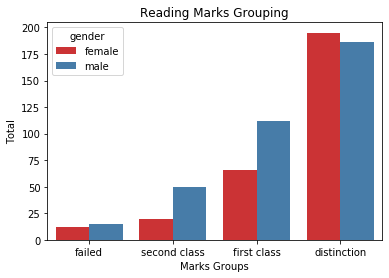

In [11]:
student_per = student_per.rename(columns={'reading score':'readingscore'})
student_per['Marks_Categories_reading'] = pd.cut(student_per.readingscore, marks_intervals, labels=categories)
ax = sns.countplot(x="Marks_Categories_reading", hue="gender", palette="Set1", data=student_per)
ax.set(title="Reading Marks Grouping", xlabel="Marks Groups", ylabel="Total")
plt.show()